# Reviewing Classification!

This notebook is meant to serve as a broad review of major classification concepts and models. It assumes that you've seen all of these concepts and models before and is framed around a series of review questions / possible interview questions, divided into several sections.

1. **Basics**: Logistic regression, KNN, naive bayes
2. **Evaluation**: How do we score classification models?
2. **Beyond Basics**: SVM; tree methods; random forest and gradient boosting

Remember this spreadsheet of model review questions and pro/con breakdowns as well! It is regression targeted but the ideas generally extend to logistic regression and classification tree methods.
https://docs.google.com/spreadsheets/d/1LLcGQLWkA3JC_U5hDr9b2XYdvfqtJiDQq7xQu5nBe_g/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Basics

1) **Explain Logistic regression.** What is the basic functional form? How do we find the model parameters? How do we interpret the coefficients?

Logistic regression models the **log odds of a binary target class** as a **linear combination** of features $x_1, ..., x_p$ plus a bias term (intercept).

$$ f(x) = \log \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p $$

To put this equation in terms of the probability of the positive class $p$, we get:

$$ p = h(x) = \frac{1}{1 + e^{-f(x)}} $$

I.e. we pass the linear combination of features $f(x)$ through the **sigmoid function**, which maps it to the range [0,1] to become a valid probability. 

The parameters of the model are the coefficients $\beta_i$, and we find them by maximizing a likelihood function with **gradient ascent** (equivalent to minimizing a cost function). For logistic regression we maximize **log likelihood** of the coefficients i.e:

$$ L(\beta_0, ..., \beta_p) = \sum_{1}^{n} y_i \log(h(x_i) + (1 - y_i) \log(1-h(x_i)) $$

For more details and the math on deriving the log likelihood equation check out [Andrew Ng's excellent course notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

We can interpret our learned coefficients $\beta_i$ by returning to the first equation. A one unit increase in the feature $x_i$ corresponds to a $\beta_i$ increase in the log odds, and therefore a $e^{\beta_i}$ multiplicative effect on the odds. In logistic regression, increasing a feature has a **linear effect on the log odds but a multiplicative effect on the odds**.

2) **How can we control the bias/variance tradeoff of a logistic regression model?**

Very similarly to linear regression, we can reformulate log likelihood as a cost function and directly add coefficient magnitude penalty terms to get **regularization**. We can use L1 (lasso) to perform feature shrinkage and selection, or L2 (ridge) for just shrinkage. This lets us reduce the variance of a logistic regression at the cost of added bias.

If we want to make a logistic regression more complex because it's underfitting, we can add polynomial and interaction terms, just like in linear regression.

3) **Explain the K-Nearest Neighbors Algorithm**. How does one choose K? What are the pros and cons of this algorithm?

KNN is a **lazy algorithm**, in the sense that we don't need to really do anything to "train" the model and only need to do work at prediction time. At prediction time on a sample point, we find the k training points that are closest in distance (often euclidean) to that sample point, and classify it as the most common class label.

We can select k through a validation/cross-validation process to see what choice has the best out of sample evaluation scores.

Pros:
* Simple
* Some interpretability - here are the most similar points
* Natural handling of multiclass problems
* Lazy evaluation means fast "training"

Cons:
* Lazy evaluation means slow to predict!
* Need to store all of the training data in memory to predict
* Can work very poorly in high dimensional feature space (curse of dimensionality)

4) **Explain the Naive Bayes Algorithm**. What are the pros and cons of this algorithm?

Let's fill this in ourselves this morning :)

## Evaluation

1) **Is classification accuracy a good scoring metric?**

It depends! You need to know the class distribution of your target. If it's close to balanced accuracy works nicely, but if it's highly unbalanced accuracy is pretty useless (i.e. 99% accuracy prediction that fraud won't occur just by predicting no fraud 100% of the time, a useless model!)

2) **What is a confusion matrix? What are precision, recall, and F1**? When should we use them?

A confusion matrix is a diagram that tabulates the true class labels vs the predicted class labels. It's a very nice way to visualize your model predictions and understand where they are going wrong. Ideally, the bulk of your predictions fall along the diagonal of the matrix (actual and predicted classes are the same).

See the [sklearn doc](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) for a nice multiclass confusion matrix example.

**Precision** measures your tendency to be correct among all the positives you predict, **recall** measures your tendency to correctly identify positives among all the true positive samples. (true positive rate). **F1** is the harmonic mean of precision and recall, representing a good balance of both.

$$ Precision = \frac{TP}{TP + FP} $$

$$ Recall = \frac{TP}{TP + FN} $$

$$ F_1 = \frac{2pr} {p+r} $$

Which metric is appropriate to focus on (and to what extent) depends very much on the problem domain. For example, when predicting fraud we want to have very few false negatives but can afford to have some false positives, so we will emphasize recall. If recommending products that a customer may want to order, we might want to use F1 to strike a balance between giving them useful suggestions but not spamming them with too many.

Here are code definitions of accuracy, precision, recall, and F1:

In [2]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

3) **What is the ROC AUC?** When should we use it as a classification metric?

Let's fill this in together this morning :)

## Beyond Basics

1) **Explain the Support Vector Classifier algorithm**. What is a maximum margin separating hyperplane? What is a linear vs. quadratic or gaussian kernel? How do we control the bias/variance tradeoff for an SVC? Can you explain the idea behind the "kernel trick"? 

I'll point you toward this [excellent resource from Chris Albon](https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/) for this one.

2) **When would we use a tree-based method** in a classification problem? What are the pros and cons?

When we want to model a nonlinear relationship, care most about predictive accuracy vs. interpretability, and don't have computational constraints, **Tree Based Methods** like random forest and gradient boosting have many nice benefits:

* Automatically model feature interactions
* Automatically model nonlinear relationships between features and target (no need for all the polynomial terms)
* Automatically select features / robust to useless features
* Robust to feature outliers
* Scale invariant (no need to standardize!)
* Natural handling of NA values

The major con of these models is that they are significantly harder to interpret than linear models / lack their clear explanability (they do have feature importance scores, but these don't give direct insight into the directional relationship between features and the target). They are also more computationally expensive.

3) **Explain the algorithm behind decision trees for classification**

Recall the [classification tree splitting notebook](https://github.com/thisismetis/nyc18_ds17/blob/master/class_lectures/week05-mcnulty2/01-trees_FE/Classification_Tree_Splitting.ipynb).

* Choose a measure of node impurity $I$, usually **gini** or **entropy** in the classification setting (see code below). For a split that partitions a node along a particular feature value, we define **information gain** as 

$$ I(parent) - (\frac{n_{l}}{N} I(child_{l}) + \frac{n_{r}}{N} I(child_{r}))$$ 

* I.e. information gain is the difference between the impurity of a node and the weighted sum of the impurity of its children. For each split, we're trying to reduce impurity as much as possible to separate data points as effectively as possible.

* Until we reach a maximum depth, maximum leaves, minimum information gain etc. stopping point:

    * For every feature:
        * For every value in feature:
            * compute info gain from splitting on that feature, track best
    * Split on best feature/value
    * Recursively split both children
    
* Generate predictions by finding the leaf that a sample falls into and **taking the plurailty class in that leaf as a label**.

Below is code showing how to compute the gini and entropy impurity metrics and visualizing their relationship with classification error.  

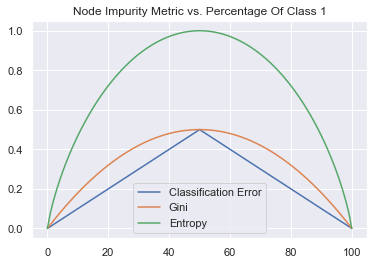

In [3]:
def get_bin_proportions(y):
    p_0 = sum(y == 0) / y.shape[0]
    p_1 = 1 - p_0
    return p_0, p_1

def class_error(y):
    return min(get_bin_proportions(y))

def bin_gini(y):
    p_0, p_1 = get_bin_proportions(y)
    return p_0 * (1 - p_0) + p_1 * (1 - p_1)

def bin_entropy(y):
    p_0, p_1 = get_bin_proportions(y)
    
    if (p_0 == 0 or p_1 == 0):
        return 0 
    else:
        return -1 * (p_0 * np.log2(p_0) + p_1 * np.log2(p_1))
    
errors, ginis, entropies = [], [], []

for i in range(0,101):
    y = np.append(np.ones((i,1)), np.zeros((100-i,1)))
    errors.append(class_error(y))
    ginis.append(bin_gini(y))
    entropies.append(bin_entropy(y))

plt.plot(errors)
plt.plot(ginis)
plt.plot(entropies)
plt.title('Node Impurity Metric vs. Percentage Of Class 1')
plt.legend(labels=['Classification Error','Gini','Entropy'])

4) **Explain the algorithm behind random forest for classification**

* We exploit an ensemble method to **reduce the variance of a strong learner** (decision tree) by averaging over many relatively uncorrelated copies of that model.

* For each base model tree, we draw a **bootstrap sample** of the training data (sampling with replacement from the rows), and for each decision tree split we draw a **random subsample of the features** to consider as selections for splitting. A typical choice of features to subsample is $\sqrt(p)$ where $p$ is the number of features. These sources of randomness help to reduce the correlation between each tree in the forest.

* We do this for $n$ base trees (hyperparameter), and make predictions by taking plurality class label votes over all $n$ base trees (hard voting) or probability weighted class label votes (more common, soft voting).

5) **Explain the algorithm behind gradient boosted trees for classification**

Recall the [gradient boosting notebook](https://github.com/thisismetis/nyc18_ds17/blob/master/class_lectures/week05-mcnulty2/02-boosting/GradientBoostedTrees_xgboost.ipynb).

The idea behind gradient boosting is to **ensemble in a way that exploits dependence instead of independence** (the approach that RF takes). Specifically, at each step we train a base learner that **learns how to correct for mistakes made by the model we've built so far**, adding that new learner to the collection. We generate predictions by summing across the entire collection at the end.

With classification loss functions, instead of iteratively fitting base learner *regression trees* to residuals we fit them to **pseudo-residuals**, i.e. gradient terms of the loss function.

Here is our generalized algorithm:

1. Choose loss function $L(y_{true},y_{pred})$
2. Initialize with best constant prediction i.e. $F_0 = argmin_{\gamma}\sum\limits_{i=1}^{N}L(y_i,\gamma)$
2. For $m = 1,...,k$:
    1. For $i = 1,...,n$: Set $r_{m-1,i} = -\frac{\partial{L(y_{i},F_{m-1}(x_i))}}{\partial{F_{m-1}(x_i)}}$
    2. Fit max depth $d$ tree $T_m$ with features $X$, target $r_{m-1}$
    3. Update $F_m(x) = F_{m-1}(x) + T_m(x)$
  
Obtain final model: $F(X) = T_0 + T_1(X) + ... + T_k(X)$

Note that we adapt to $k > 2$ class classification problems by training k of these models using [softmax loss](https://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html).